In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt   
import pandas as pd
import numpy as np
from tqdm import tqdm
from tqdm import tnrange, tqdm_notebook
from time import sleep
import scipy
import operator
import difflib
from IPython.core.display import display,HTML
try:
    import cPickle as pickle     #it is faster than pickle!
except:
    import pickle
    
import unicodedata
import networkx as nx
import itertools
import seaborn as sns   ### https://seaborn.pydata.org/tutorial/categorical.html
    
display(HTML("<style>.container { width:100% !important; }</style>"))  # to make the notebook use the entire width of the browser


import plotly.plotly as py
from plotly.graph_objs import *


import plotly.tools as tls
tls.set_credentials_file(username='juliettapc', api_key='S3F0wIl4ix9z4GplKfx7')  # my plotly account credentials



########## to be able to plot offline (without sending the plots to the plotly server every time)
import plotly.offline as offline
#from plotly.graph_objs import *

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
################

In [2]:
font_legend=40
font_axes=50
font_ticks=40
font='Times new roman'

In [3]:
### example for figure 1 in my paper
path="/home/juliaponcela/at_NICO/Supply_networks/Paper/"
input_file='example_Data.csv'
df=pd.read_csv(path+input_file, sep=',',na_values=["NAN","-1","null"],parse_dates=['Starting_transaction_date','Ending_transaction_date']) # set header=0 if i wanna pass it my own list of header names



#input2="Raw_data_dyad_links_in_row_trans_btw_firms_yrly_mthly_Feb19_2016.csv"
#paidbyfi,paidforf,periodfr,periodto,adjgr,gross,net,caf,liqdmg,cafper,rateper,ratecode
#df=pd.read_csv(path+input2, sep=',',na_values=["NAN","-1","null"],low_memory=False, parse_dates=['periodfr','periodto']) # set header=0 if i wanna pass it my own list of header names
print df.shape
df.head(20)

(12, 5)


,Designer,Contractor,Starting_transaction_date,Ending_transaction_date,Dollars
0,D1,C1,1987-05-01,1987-05-31,1719.18
1,D1,C2,1987-11-01,1987-11-30,2500.00
2,D1,C3,1987-11-01,1987-11-30,-2700.00
3,D1,C4,1988-04-01,1988-04-30,41331.90
4,D1,C5,1988-05-01,1988-05-30,2700000.00
5,D1,C6,1988-04-01,1988-04-30,3312.90
6,D2,C1,1988-05-01,1988-05-31,1889.19
7,D2,C5,1988-06-01,1988-06-30,945.83
8,D3,C2,1988-06-01,1988-06-30,-3945.83
9,D3,C2,1988-06-01,1988-06-30,2045.83


In [4]:

#original columns:    P_inf Mi Cj Mi_Cj MCJ num_trans start_date_trans start_time_trans end_date_trans end_time_trans first_day_trans last_day_trans length_trans period_end first_date_mi_cj first_time_mi_cj 
#first_day_mi_cj net_adj_gross tot_pos_gross tot_neg_gross frac_neg_pos acumm_pos_gross accum_num_trans k_M_fin k_C_fin num_M_i num_C_i num_J_i num_M_j num_C_j num_J_j k_M_fin_accum k_C_fin_accum 
#artificial_start_date_trans artificial_start_time_trans overlap year N L CC_m_fin CC_c_fin betweenness_m_fin betweenness_c_fin max_clique_size_m_fin max_clique_size_c_fin kshell_m_fin kshell_c_fin p_inf_prev_trans 
#accum_inf_prev_ij accum_inf_prev_neighb_i frac_accum_inf_prev_neighb_i accum_inf_prev_neighb_j frac_accum_inf_prev_neighb_j history_ij min_dist_i_to_inf avg_dist_i_to_inf min_dist_j_to_inf avg_dist_j_to_inf degree_asym_ij 
#business_asym_ij zs_error_rate_ij_year_degree Dist zip1 zip2 core_score_year_i core_score_year_j 

path="/home/juliaponcela/at_NICO/Supply_networks/Results/"
input_file='Simplified_stata_file_Pinf_vs_mulitiple_variables_monthly_slicing_dropped_overlaps_randomly_from_list_SORTED_CHRONOLOGICALLY.csv'
df=pd.read_csv(path+input_file, sep=' ',na_values=["NAN","-1","null"],low_memory=False, parse_dates=['start_date_trans','end_date_trans','first_date_mi_cj']) # set header=0 if i wanna pass it my own list of header names



#input2="Raw_data_dyad_links_in_row_trans_btw_firms_yrly_mthly_Feb19_2016.csv"
#paidbyfi,paidforf,periodfr,periodto,adjgr,gross,net,caf,liqdmg,cafper,rateper,ratecode
#df=pd.read_csv(path+input2, sep=',',na_values=["NAN","-1","null"],low_memory=False, parse_dates=['periodfr','periodto']) # set header=0 if i wanna pass it my own list of header names
print df.shape
df.head()

(282164, 67)


,P_inf,Mi,Cj,Mi_Cj,MCJ,num_trans,start_date_trans,start_time_trans,end_date_trans,end_time_trans,...,avg_dist_j_to_inf,degree_asym_ij,business_asym_ij,zs_error_rate_ij_year_degree,Dist,zip1,zip2,core_score_year_i,core_score_year_j,Unnamed: 66
0,0,102428,20590538,102428_20590538,1,1,1985-01-01,00:00:00,1985-01-04,00:00:00,...,5.732673,0.020408,0.100505,0.986396,45.968269,10018.0,11779,0.958333,0.666667,NaN
1,1,2701078,402001,2701078_402001,1,2,1985-01-01,00:00:00,1985-01-04,00:00:00,...,7.820000,0.669421,0.401927,1.986364,1084.450262,64116.0,7503,0.328947,0.875000,NaN
2,0,2701078,403431,2701078_403431,1,1,1985-01-01,00:00:00,1985-01-04,00:00:00,...,7.762376,0.669421,0.909203,0.730253,1091.063772,64116.0,7030,0.328947,0.370370,NaN
3,0,2701078,403477,2701078_403477,1,1,1985-01-01,00:00:00,1985-01-04,00:00:00,...,7.762376,0.669421,0.509241,1.588357,1091.063772,64116.0,7030,0.328947,1.000000,NaN
4,0,2701078,405851,2701078_405851,1,1,1985-01-01,00:00:00,1985-01-04,00:00:00,...,7.762376,0.669421,0.970217,1.968710,NaN,64116.0,NaN,0.328947,1.000000,NaN


In [ ]:
# test=df[df['Mi_Cj'].str.startswith('6203279_')]   # i get a subsample of the data: only those columns with 
# test.plot(x='start_date_trans',y='P_inf',ls='',marker='.') 

In [5]:
lista_C=list(df.Cj.unique())
lista_M=list(df.Mi.unique())
lista_J=list(set(lista_C)&set(lista_M))
lista_all=list(set(list(lista_C)+list(lista_M)))

lista_all_minus_J=list(set(list(lista_C)+list(lista_M)))
for item in lista_J:    
    lista_all_minus_J.remove(item)
    lista_C.remove(item)
    lista_M.remove(item)

    
print  "C:",len(lista_C)
print "M:", len(lista_M)
print "J:", len(lista_J)
print "all:",  len(lista_all)
print "all-J:", len(lista_all_minus_J)
7272+921+496

C: 7272
M: 921
J: 496
all: 8689
all-J: 8193


8689

In [55]:
dict_ID_list_transaction_dates={}
dict_ID_list_partners={}
for Mi in df.Mi.unique():
    try:
        dict_ID_list_transaction_dates[Mi]
    except KeyError:
        dict_ID_list_transaction_dates[Mi]=[]
        
        
    test=df[df['Mi']== Mi].sort_values(by='start_date_trans', ascending=True)
    
    last=test.iloc[-1]['end_date_trans']
    first=test.iloc[0]['start_date_trans']
    
    
    dict_ID_list_transaction_dates[Mi].append(first)
    dict_ID_list_transaction_dates[Mi].append(last)
    
    
    try:
        dict_ID_list_partners[Mi]
    except KeyError:
        dict_ID_list_partners[Mi]=[]
    lista=list(test.Cj.unique())
    dict_ID_list_partners[Mi] += lista

 
print len(dict_ID_list_transaction_dates)
    
   



for Cj in df.Cj.unique():
    try:
        dict_ID_list_transaction_dates[Cj]
    except KeyError:
        dict_ID_list_transaction_dates[Cj]=[]
        
        
    test=df[df['Cj']== Cj].sort_values(by='start_date_trans', ascending=True)
    
    last=test.iloc[-1]['end_date_trans']
    first=test.iloc[0]['start_date_trans']
    
    
    dict_ID_list_transaction_dates[Cj].append(first)
    dict_ID_list_transaction_dates[Cj].append(last)
 


    try:
        dict_ID_list_partners[Cj]
    except KeyError:
        dict_ID_list_partners[Cj]=[]
        
    lista=list( test.Mi.unique()  )
    dict_ID_list_partners[Cj]  += lista



print len(dict_ID_list_transaction_dates)


1417
8689


In [54]:
len(dict_ID_list_partners)

1

In [56]:
list_num_partners=[]
for ID in dict_ID_list_partners:
    list_num_partners.append(len(set(dict_ID_list_partners[ID])))

print "mean number of partners per company:", np.mean(list_num_partners), "\nstd:",np.std(list_num_partners),"\nmedian:", np.median(list_num_partners), "\nmax:",max(list_num_partners), "\nmin:",min(list_num_partners)

for q in [10,25,50,75,95,100]:
    print np.percentile(list_num_partners,q)                              

mean number of partners per company: 6.54689837726 
std: 21.6746656535 
median: 2.0 
max: 637 
min: 1
1.0
1.0
2.0
5.0
18.0
637.0


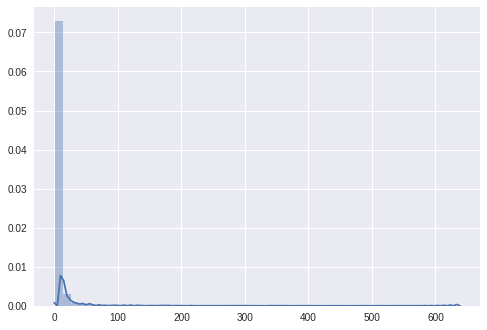

In [57]:
sns.distplot(list_num_partners)

In [22]:
dict_firms_lifespan={}
list_lifespans=[]
for ID in dict_ID_list_transaction_dates:
    sorted_list=sorted(dict_ID_list_transaction_dates[ID])
    lifespan=(sorted_list[-1]-sorted_list[0]).days
    dict_firms_lifespan[ID]=lifespan
    list_lifespans.append(lifespan)

print "mean company lifespan:", np.mean(list_lifespans), "\nstd company lifespan:",np.std(list_lifespans),"\nmedian company lifespan:", np.median(list_lifespans), "\nmax company lifespan:",max(list_lifespans), "\nmin company lifespan:",min(list_lifespans)

for q in [10,25,50,75,95,100]:
    print np.percentile(list_lifespans,q) 

mean company lifespan: 1055.9441823 
std company lifespan: 1255.65684066 
median company lifespan: 607.0 
max company lifespan: 7090 
min company lifespan: 3
58.0
211.0
607.0
1399.0
3585.8
7090.0


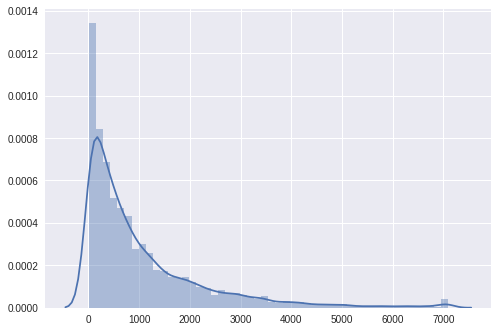

In [23]:
sns.distplot(list_lifespans)

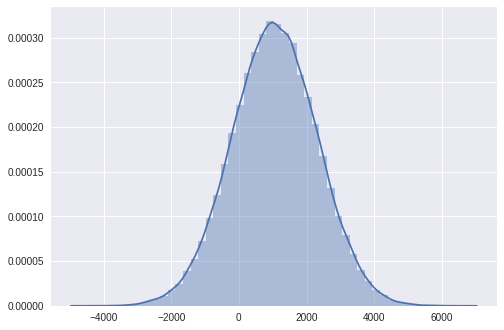

In [40]:
import random
avg=1055
std=1255
lista_sintetica=[]
for i in range(100000):
    lista_sintetica.append( random.normalvariate(avg, std))
    
sns.distplot(lista_sintetica)

In [289]:
list_num_trans_per_partnership=[]
cont_single_transactions=0
list_error_no_error_by_partnership=[]
for Mi_Cj in df.Mi_Cj.unique():
    test=df[df['Mi_Cj']== Mi_Cj]
    
    error=test['P_inf'].sum()
    if error >=1:
        list_error_no_error_by_partnership.append(1.)
    else:
        list_error_no_error_by_partnership.append(0.)
    
    
    tot_num_tr=test['num_trans'].sum()
    list_num_trans_per_partnership.append(tot_num_tr)
    if tot_num_tr ==1:
            cont_single_transactions +=1
    #raw_input()
print "avg num trans per partnership:",np.mean(list_num_trans_per_partnership)    
print "number of partnerships with single trans:",cont_single_transactions, cont_single_transactions/float(len(df.Mi_Cj.unique()))*100.
print "tot number of partnerships with at least one error:",sum(list_error_no_error_by_partnership),  np.mean(list_error_no_error_by_partnership)*100, "%"

avg num trans per partnership: 11.1414591371
number of partnerships with single trans: 6536 22.9252893722
tot number of partnerships with at least one error: 6035.0 21.1680112241 %


In [290]:
print "avg num transactions per partnership:",np.mean(list_num_trans_per_partnership)  , " min:",min(list_num_trans_per_partnership), " max:",max(list_num_trans_per_partnership) 
print "number of partnerships with single trans:",cont_single_transactions, cont_single_transactions/float(len(df.Mi_Cj.unique()))*100.

avg num transactions per partnership: 11.1414591371  min: 1  max: 954
number of partnerships with single trans: 6536 22.9252893722


In [291]:
print df["P_inf"].sum()/float(len(df))
print len(df)

0.0447044980933
282164


In [292]:
print  "avg transaction length",df["length_trans"].mean(),"   median:",df["length_trans"].median(),"   max:", df["length_trans"].max(),"   min:", df["length_trans"].min()

avg transaction length 33.7351114954    median: 31.0    max: 760    min: 2


In [ ]:
#df[df.start_date_trans == df.end_date_trans].shape

#df = df.sort_values(by=['c1','c2'], ascending=[False,True])
#cont_single_transactions=0
list_relationship_lengths=[]
for Mi_Cj in df.Mi_Cj.unique():
    test=df[df['Mi_Cj']== Mi_Cj].sort_values(by='start_date_trans', ascending=True)
    
    relationship_length=(test.iloc[-1]['start_date_trans']-test.iloc[0]['start_date_trans']).days    
    list_relationship_lengths.append(relationship_length)
    
print "avg relationship length:"   , np.mean(list_relationship_lengths), " min:",min(list_relationship_lengths), " max:",max(list_relationship_lengths)

In [ ]:
df[df.Mi_Cj == "102428_20590538"].sort_values(by='start_date_trans', ascending=True)
df[['Mi','Cj','start_date_trans','end_date_trans','net_adj_gross']].sort_values(by=['Mi','start_date_trans'], ascending=[True, True])

In [ ]:
#df[df.start_date_trans == df.end_date_trans].shape

#df = df.sort_values(by=['c1','c2'], ascending=[False,True])
#cont_single_transactions=0
list_error_rates=[]
for Mi_Cj in df.Mi_Cj.unique():
    test=df[df['Mi_Cj']== Mi_Cj]#.sort_values(by='start_date_trans', ascending=True)
    
    e_rate=test['P_inf'].sum()/float(len(test))
    
    list_error_rates.append(e_rate)
    
print "avg error rate per partnership:"   , np.mean(list_error_rates), " min:",min(list_error_rates), " max:",max(list_error_rates),"median:", np.median(list_error_rates)

In [ ]:
df.columns

In [ ]:
print "tot number of partnerships with at least one error:",sum(list_error_no_error_by_partnership)

In [ ]:
path="/home/juliaponcela/at_NICO/Supply_networks/Results/"
input_file='survival_curves_list_values.xlsx'
# df=pd.read_csv(path+inpu_file, sep=' ',na_values=["NAN","-1","null"],low_memory=False, parse_dates=['start_date_trans','end_date_trans','first_date_mi_cj']) # set header=0 if i wanna pass it my own list of header names


df = pd.read_excel(open(path+input_file,'rb'))

print df.shape
df.head()

In [ ]:
df1 = df[['Probability of relationships ending','Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8']]
new_file_name=path+"Probability_of_relationships_ending_aux.csv"
df1.to_csv(new_file_name, sep=',')
print "written:", new_file_name

df1.head(200)




df2=df[['Unnamed: 12']]
new_file_name=path+"Nelson-Aalen_cum_Haz_aux_aux.csv"
df2.to_csv(new_file_name, sep=' ')
print "written:", new_file_name

df2.head(200)





df4=df[['Unnamed: 26']]#,'Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33']]
new_file_name=path+"Probability_of_errors_happening_Pinf_all_aux.csv"
df4.to_csv(new_file_name, sep=' ')
print "written:", new_file_name




df5=df[['Unnamed: 37']]#,'Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41']]
new_file_name=path+"Probability_of_errors_happening_Pinf__Nelson_aalen_cum_haz_all_aux.csv"
df5.to_csv(new_file_name, sep=' ')
print "written:", new_file_name


df6=df[['Unnamed: 46']]
new_file_name=path+"Probability_of_errors_happening_Pinf_Nelson_aalen_cum_haz_Subpopulation_Overlap_cat_aux.csv"
df6.to_csv(new_file_name, sep=' ')
print "written:", new_file_name



df7=df[['Unnamed: 55']]
new_file_name=path+"Probability_of_errors_happening_Pinf_Kaplan-Meier_cum_haz_Subpopulation_Overlap_cat_aux.csv"
df7.to_csv(new_file_name, sep=' ')
print "written:", new_file_name




df8=df[['Unnamed: 63']]#,'Unnamed: 64','Unnamed: 65','Unnamed: 66','Unnamed: 67']]
new_file_name=path+"Probability_of_errors_happening_Pinf_Nelson-Aalen_cum_haz_Subpopulation_num_contractors_aux.csv"
df8.to_csv(new_file_name, sep=' ')
print "written:", new_file_name


df9=df[['Unnamed: 72','Unnamed: 73',]]
new_file_name=path+"Probability_of_errors_happening_Pinf_Kaplan-Meier_survival_curve_Subpopulation_num_contractors_aux.csv"
df9.to_csv(new_file_name, sep=' ')
print "written:", new_file_name







In [ ]:
for item in df.columns:
    print item

In [ ]:
#### FOR PLOTTING SURVIVAL CURVES FOR THE PAPER

In [ ]:
df1.head(200)

In [ ]:
df0.head(200)

In [242]:


# path="/home/juliaponcela/at_NICO/Supply_networks/Results/"
# input_file='Kaplan_Meier_survival_estimates_Pdeath_by_subpopulation_errors_or_not.csv'
# df=pd.read_csv(path+input_file, sep=' ',na_values=["NAN","-1","null"],low_memory=False)#, parse_dates=['start_date_trans','end_date_trans','first_date_mi_cj']) # set header=0 if i wanna pass it my own list of header names


# df0=df[df['p_inf']==0]
# df1=df[df['p_inf']==1]



# # ### line 0
# x0=df0['time']
# y0=df0['survivor']

# # #line 1
# x1=df1['time']
# y1=df1['survivor']


# # Create traces
# trace0 = go.Scatter(
#     x = x0,
#     y = y0,
#     mode = 'lines',
#     name = 'no errors at t-1'
# )
# trace1 = go.Scatter(
#     x = x1,
#     y = y1,
#     mode = 'lines',  
#     name = 'errors at t-1'
# )

# data = [trace0, trace1]

# layout = Layout(   
#     xaxis=XAxis(        
#         range=[1,1600],  
#         title='Time [days]',
#         ),   
#     yaxis=YAxis(               
#         title='Survival Rate',
#         ),   
#     )




# fig = { 'data':data ,'layout':layout}
# iplot(fig, filename='simple line')
# #offline.plot(fig, filename='line-mode.html')




In [16]:


path="/home/juliaponcela/at_NICO/Supply_networks/Results/"
input_file='Kaplan_Meier_survival_estimates_Pdeath_by_subpopulation_errors_or_not.csv'
df=pd.read_csv(path+input_file, sep=' ',na_values=["NAN","-1","null"],low_memory=False)#, parse_dates=['start_date_trans','end_date_trans','first_date_mi_cj']) # set header=0 if i wanna pass it my own list of header names


df0=df[df['p_inf']==0]
df1=df[df['p_inf']==1]



##### line 0
x0=list(df0['time'])
x0_rev=list(df0['time'][::-1])

y0=list(df0['survivor'])
y0_upper=list(df0['95_Conf_Int_upper'])
y0_lower=list(df0['95_Conf_Int_lower'])
y0_lower=list(df0['95_Conf_Int_lower'][::-1]) # i reverse the order of the lower bound line (not SURE WHY!)



# Line 1
# y1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# y1_upper = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# y1_lower = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# y1_lower = y1_lower[::-1]

# # Line 2
# y2 = [5, 2.5, 5, 7.5, 5, 2.5, 7.5, 4.5, 5.5, 5]
# y2_upper = [5.5, 3, 5.5, 8, 6, 3, 8, 5, 6, 5.5]
# y2_lower = [4.5, 2, 4.4, 7, 4, 2, 7, 4, 5, 4.75]
# y2_lower = y2_lower[::-1]
#### line 1
x1=list(df1['time'])
x1_rev=x1[::-1]

y1=list(df1['survivor'])
y1_upper=list(df1['95_Conf_Int_upper'])
y1_lower=list(df1['95_Conf_Int_lower'])
y1_lower=list(df1['95_Conf_Int_lower'][::-1] )# i reverse the order of the lower bound line (not SURE WHY!)



##########OJO CON LA SUMA DE ARRAYS O DATAFRAMES !!!!!!!!!!!!! (ES COMO SUMAR MATRICES, NO COMO CONCATENACION DE LISTAS!!!)



trace1 = Scatter(
    x=x0+x0_rev,
    y=y0_upper+y0_lower,
    fill='tozerox',
    fillcolor='rgba(0,205,205,0.2)',
    line=Line(color='transparent'),
    showlegend=False,
    name='no errors at t-1',
)

trace2 = Scatter(
    x=x1+x1_rev,
    y=y1_upper+y1_lower,
    fill='tozerox',
    fillcolor='rgba(255,64,64,0.2)',
    line=Line(color='transparent'),
    name='errors at t-1',
    showlegend=False,
)


trace4 = Scatter(
    x=x0,
    y=y0,
    line=Line(color='rgb( 0,139,139)'),
    mode='lines',
    name='no errors at t-1',
)
trace5 = Scatter(
    x=x1,
    y=y1,
    line=Line(color='rgb(238,59,59)'),
    mode='lines',
    name='errors at t-1',
)


#light blue:121;205;205    0;205;205
#darker blue 0;139;139

#light red: 238;180;180    255;64;64
#dark red: 238;59;59


data = Data([trace1, trace2,  trace4, trace5])



layout = Layout(
    legend=dict(x=.75, y=.9, # normalized coordenates 0-1
               font=dict(
                    family=font,
                    size=font_legend),
               ),   
    
    margin=go.Margin(  # if i allow for a margin, then the big axis labels dont overlap with the ticks
        l=150,
        r=50,
        b=150,
        t=0,       
    ),
    
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(224,224,224)',
    xaxis=XAxis(
        titlefont=dict(
            family=font,
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ),       
        title='Time [days]',
        gridcolor='rgb(255,255,255)',
        range=[1,1600],        
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',        
        tickfont=dict(      
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
    yaxis=YAxis(
        title='Survival Rate for relationships',
        titlefont=dict(
            family=font,#family='Arial, sans-serif',
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ),  
        gridcolor='rgb(255,255,255)',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
         tickfont=dict(   
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
)




fig = Figure(data=data, layout=layout)
iplot(fig, filename= 'shaded_lines')
#offline.plot(fig, filename='line-mode.html')




### i save the figure as html (interactive, that can be open on any browser), and from them i can save as png
offline.plot(fig, auto_open=True, image = 'png', image_filename=input_file.strip(".csv") ,
             output_type='file', image_width=1600, image_height=1000, filename=path+input_file.strip(".csv")+'.html', validate=False)

'file:///home/juliaponcela/at_NICO/Supply_networks/Results/Kaplan_Meier_survival_estimates_Pdeath_by_subpopulation_errors_or_not.html'

In [19]:


path="/home/juliaponcela/at_NICO/Supply_networks/Results/"
input_file='Nelson-Aalen _Cum_Haz_Pdeath_by_subpopulation_errors_or_not.csv'
df=pd.read_csv(path+input_file, sep=' ',na_values=["NAN","-1","null"],low_memory=False)#, parse_dates=['start_date_trans','end_date_trans','first_date_mi_cj']) # set header=0 if i wanna pass it my own list of header names


df0=df[df['p_inf']==0]
df1=df[df['p_inf']==1]



##### line 0
x0=list(df0['time'])
x0_rev=list(df0['time'][::-1])

y0=list(df0['Nelson-AalenCum_Haz'])
y0_upper=list(df0['95_Conf_Int_upper'])
y0_lower=list(df0['95_Conf_Int_lower'])
y0_lower=list(df0['95_Conf_Int_lower'][::-1]) # i reverse the order of the lower bound line (not SURE WHY!)



# Line 1
# y1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# y1_upper = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# y1_lower = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# y1_lower = y1_lower[::-1]

# # Line 2
# y2 = [5, 2.5, 5, 7.5, 5, 2.5, 7.5, 4.5, 5.5, 5]
# y2_upper = [5.5, 3, 5.5, 8, 6, 3, 8, 5, 6, 5.5]
# y2_lower = [4.5, 2, 4.4, 7, 4, 2, 7, 4, 5, 4.75]
# y2_lower = y2_lower[::-1]
#### line 1
x1=list(df1['time'])
x1_rev=x1[::-1]

y1=list(df1['Nelson-AalenCum_Haz'])
y1_upper=list(df1['95_Conf_Int_upper'])
y1_lower=list(df1['95_Conf_Int_lower'])
y1_lower=list(df1['95_Conf_Int_lower'][::-1] )# i reverse the order of the lower bound line (not SURE WHY!)



##########OJO CON LA SUMA DE ARRAYS O DATAFRAMES !!!!!!!!!!!!! (ES COMO SUMAR MATRICES, NO COMO CONCATENACION DE LISTAS!!!)



trace1 = Scatter(
    x=x0+x0_rev,
    y=y0_upper+y0_lower,
    fill='tozerox',
    fillcolor='rgba(0,205,205,0.2)',
    line=Line(color='transparent'),
    showlegend=False,
    name='no errors at t-1',
)

trace2 = Scatter(
    x=x1+x1_rev,
    y=y1_upper+y1_lower,
    fill='tozerox',
    fillcolor='rgba(255,64,64,0.2)',
    line=Line(color='transparent'),
    name='errors at t-1',
    showlegend=False,
)


trace4 = Scatter(
    x=x0,
    y=y0,
    line=Line(color='rgb( 0,139,139)'),
    mode='lines',
    name='no errors at t-1',
)
trace5 = Scatter(
    x=x1,
    y=y1,
    line=Line(color='rgb(238,59,59)'),
    mode='lines',
    name='errors at t-1',
)


#light blue:121;205;205    0;205;205
#darker blue 0;139;139

#light red: 238;180;180    255;64;64
#dark red: 238;59;59


data = Data([trace2, trace1,  trace5, trace4])



layout = Layout(   
    legend=dict(x=.7, y=.15, # location normalized coordenates 0-1
               font=dict(
                    family=font,
                    size=font_legend),
               ),  
    
    
    margin=go.Margin(  # if i allow for a margin, then the big axis labels dont overlap with the ticks
        l=150,
        r=0,
        b=150,
        t=0,       
    ),
    
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(224,224,224)',
    xaxis=XAxis(
        title='Time [days]',
        titlefont=dict(
            family=font,#family='Arial, sans-serif',
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ),  
        gridcolor='rgb(255,255,255)',
        #range=[1,1600],        
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
         tickfont=dict(  
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
    yaxis=YAxis(
        title='Cummulative Hazard Rate for relationships',
        titlefont=dict(
            family=font,#family='Arial, sans-serif',
            size=40,
            color='black'
        #    color='lightgrey'
        ),  
        gridcolor='rgb(255,255,255)',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        tickfont=dict(    
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
)










fig = Figure(data=data, layout=layout)
iplot(fig, filename= 'shaded_lines')
#offline.plot(fig, filename='line-mode.html')



### i save the figure as html (interactive, that can be open on any browser), and from them i can save as png
offline.plot(fig, auto_open=True, image = 'png', image_filename=input_file.strip(".csv") ,
             output_type='file', image_width=1600, image_height=1000, filename=path+input_file.strip(".csv")+'.html', validate=False)

'file:///home/juliaponcela/at_NICO/Supply_networks/Results/Nelson-Aalen _Cum_Haz_Pdeath_by_subpopulation_errors_or_not.html'

In [20]:


path="/home/juliaponcela/at_NICO/Supply_networks/Results/"
input_file='Probability_of_errors_happening_Pinf_Kaplan-Meier_survival_curve_Subpopulation_Overlap_cat.csv'
df=pd.read_csv(path+input_file, sep=' ',na_values=["NAN","-1","null"],low_memory=False)#, parse_dates=['start_date_trans','end_date_trans','first_date_mi_cj']) # set header=0 if i wanna pass it my own list of header names



df0=df[df['cat_overlap']==0]
df1=df[df['cat_overlap']==1]




##### line 0
x0=list(df0['time'])
x0_rev=list(df0['time'][::-1])

y0=list(df0['Kaplan-Meier_Survival_Curve'])
y0_upper=list(df0['95_Conf_Int_upper'])
y0_lower=list(df0['95_Conf_Int_lower'])
y0_lower=list(df0['95_Conf_Int_lower'][::-1]) # i reverse the order of the lower bound line (not SURE WHY!)



# Line 1
# y1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# y1_upper = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# y1_lower = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# y1_lower = y1_lower[::-1]

# # Line 2
# y2 = [5, 2.5, 5, 7.5, 5, 2.5, 7.5, 4.5, 5.5, 5]
# y2_upper = [5.5, 3, 5.5, 8, 6, 3, 8, 5, 6, 5.5]
# y2_lower = [4.5, 2, 4.4, 7, 4, 2, 7, 4, 5, 4.75]
# y2_lower = y2_lower[::-1]
#### line 1
x1=list(df1['time'])
x1_rev=x1[::-1]

y1=list(df1['Kaplan-Meier_Survival_Curve'])
y1_upper=list(df1['95_Conf_Int_upper'])
y1_lower=list(df1['95_Conf_Int_lower'])
y1_lower=list(df1['95_Conf_Int_lower'][::-1] )# i reverse the order of the lower bound line (not SURE WHY!)



##########OJO CON LA SUMA DE ARRAYS O DATAFRAMES !!!!!!!!!!!!! (ES COMO SUMAR MATRICES, NO COMO CONCATENACION DE LISTAS!!!)



trace1 = Scatter(
    x=x0+x0_rev,
    y=y0_upper+y0_lower,
    fill='tozerox',
    fillcolor='rgba(0,205,205,0.2)',
    line=Line(color='transparent'),
    showlegend=False,
    name='overlapping transitions',
)

trace2 = Scatter(
    x=x1+x1_rev,
    y=y1_upper+y1_lower,
    fill='tozerox',
    fillcolor='rgba(255,64,64,0.2)',
    line=Line(color='transparent'),
    name='no overlapping transitions',
    showlegend=False,
)


trace4 = Scatter(
    x=x0,
    y=y0,
    line=Line(color='rgb( 0,139,139)'),
    mode='lines',
    name='multiple simultaneous transactions',
)
trace5 = Scatter(
    x=x1,
    y=y1,
    line=Line(color='rgb(238,59,59)'),
    mode='lines',
    name='no multiple simultaneous transactions',
)


#light blue:121;205;205    0;205;205
#darker blue 0;139;139

#light red: 238;180;180    255;64;64
#dark red: 238;59;59


data = Data([trace1, trace2,  trace4, trace5])



layout = Layout(
    legend=dict(x=.2, y=.2, # normalized coordenates 0-1
                font=dict(
                     family=font,
                     size=font_legend),
                ),       
    
    
     margin=go.Margin(  # if i allow for a margin, then the big axis labels dont overlap with the ticks
        l=150,
        r=0,
        b=150,
        t=0,       
    ),
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(224,224,224)',
    xaxis=XAxis(
        title='Time [days]',
        titlefont=dict(
            family=font,#family='Arial, sans-serif',
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ), 
        gridcolor='rgb(255,255,255)',
       # range=[1,1600],        
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        tickfont=dict( 
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
    yaxis=YAxis(
        title='Survival Rate for error occurrence',
        titlefont=dict(
            family=font,#family='Arial, sans-serif',
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ), 
        gridcolor='rgb(255,255,255)',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        tickfont=dict(  
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
)








fig = Figure(data=data, layout=layout)
iplot(fig, filename= 'shaded_lines')
#offline.plot(fig, filename=input_file.strip(".csv")+'.html')
#offline.plot(fig, filename=path+input_file.strip(".csv")+'.html')




### i save the figure as html (interactive, that can be open on any browser), and from them i can save as png
offline.plot(fig, auto_open=True, image = 'png', image_filename=input_file.strip(".csv") ,
             output_type='file', image_width=1600, image_height=1000, filename=path+input_file.strip(".csv")+'.html', validate=False)

'file:///home/juliaponcela/at_NICO/Supply_networks/Results/Probability_of_errors_happening_Pinf_Kaplan-Meier_survival_curve_Subpopulation_Overlap_cat.html'

In [22]:


path="/home/juliaponcela/at_NICO/Supply_networks/Results/"
input_file='Probability_of_errors_happening_Pinf_Nelson_aalen_cum_haz_Subpopulation_Overlap_cat.csv'
df=pd.read_csv(path+input_file, sep=' ',na_values=["NAN","-1","null"],low_memory=False)#, parse_dates=['start_date_trans','end_date_trans','first_date_mi_cj']) # set header=0 if i wanna pass it my own list of header names


df0=df[df['overlap_cat']==0]
df1=df[df['overlap_cat']==1]



##### line 0
x0=list(df0['time'])
x0_rev=list(df0['time'][::-1])

y0=list(df0['Nelson-AalenCum_Haz'])
y0_upper=list(df0['95_Conf_Int_upper'])
y0_lower=list(df0['95_Conf_Int_lower'])
y0_lower=list(df0['95_Conf_Int_lower'][::-1]) # i reverse the order of the lower bound line (not SURE WHY!)



# Line 1
# y1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# y1_upper = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# y1_lower = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# y1_lower = y1_lower[::-1]

# # Line 2
# y2 = [5, 2.5, 5, 7.5, 5, 2.5, 7.5, 4.5, 5.5, 5]
# y2_upper = [5.5, 3, 5.5, 8, 6, 3, 8, 5, 6, 5.5]
# y2_lower = [4.5, 2, 4.4, 7, 4, 2, 7, 4, 5, 4.75]
# y2_lower = y2_lower[::-1]
#### line 1
x1=list(df1['time'])
x1_rev=x1[::-1]

y1=list(df1['Nelson-AalenCum_Haz'])
y1_upper=list(df1['95_Conf_Int_upper'])
y1_lower=list(df1['95_Conf_Int_lower'])
y1_lower=list(df1['95_Conf_Int_lower'][::-1] )# i reverse the order of the lower bound line (not SURE WHY!)



##########OJO CON LA SUMA DE ARRAYS O DATAFRAMES !!!!!!!!!!!!! (ES COMO SUMAR MATRICES, NO COMO CONCATENACION DE LISTAS!!!)



trace1 = Scatter(
    x=x0+x0_rev,
    y=y0_upper+y0_lower,
    fill='tozerox',
    fillcolor='rgba(0,205,205,0.2)',
    line=Line(color='transparent'),
    showlegend=False,
    name='no multiple simultaneous transactions',
)

trace2 = Scatter(
    x=x1+x1_rev,
    y=y1_upper+y1_lower,
    fill='tozerox',
    fillcolor='rgba(255,64,64,0.2)',
    line=Line(color='transparent'),
    name='multiple simultaneous transactions',
    showlegend=False,
)


trace4 = Scatter(
    x=x0,
    y=y0,
    line=Line(color='rgb( 0,139,139)'),
    mode='lines',
    name='no multiple simultaneous transactions',
)
trace5 = Scatter(
    x=x1,
    y=y1,
    line=Line(color='rgb(238,59,59)'),
    mode='lines',
    name='multiple simultaneous transactions',
)


#light blue:121;205;205    0;205;205
#darker blue 0;139;139

#light red: 238;180;180    255;64;64
#dark red: 238;59;59


data = Data([trace2, trace1,  trace5, trace4])



layout = Layout(
    legend=dict(x=.5, y=.15, # normalized coordenates 0-1
               font=dict(
                    family=font,
                    #color='black',
                    size=font_legend),
               ),   
    
     margin=go.Margin(  # if i allow for a margin, then the big axis labels dont overlap with the ticks
        l=150,
        r=0,
        b=150,
        t=0,       
    ),
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(224,224,224)',
    xaxis=XAxis(
        title='Time [days]',
        titlefont=dict(
             family=font,#             #family='Arial, sans-serif',
             size=font_axes,
             color='black'
#         #    color='lightgrey'
         ),       
        gridcolor='rgb(255,255,255)',
        #range=[1,1600],        
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        tickfont=dict(  
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
    yaxis=YAxis(
        title='Cummulative Hazard Rate for error occurrence',
        titlefont=dict(
             family=font,#             #family='Arial, sans-serif',
             size=40,
             color='black'
#         #    color='lightgrey'
         ),       
        gridcolor='rgb(255,255,255)',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        tickfont=dict(   
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
)







fig = Figure(data=data, layout=layout)
iplot(fig, filename= 'shaded_lines')
#offline.plot(fig, filename='line-mode.html')



### i save the figure as html (interactive, that can be open on any browser), and from them i can save as png
offline.plot(fig, auto_open=True, image = 'png', image_filename=input_file.strip(".csv") ,
             output_type='file', image_width=1600, image_height=1000, filename=path+input_file.strip(".csv")+'.html', validate=False)

'file:///home/juliaponcela/at_NICO/Supply_networks/Results/Probability_of_errors_happening_Pinf_Nelson_aalen_cum_haz_Subpopulation_Overlap_cat.html'

In [24]:


path="/home/juliaponcela/at_NICO/Supply_networks/Results/"
input_file='Probability_of_errors_happening_Pinf_Nelson-Aalen_cum_haz_Subpopulation_num_contractors.csv'
df=pd.read_csv(path+input_file, sep=' ',na_values=["NAN","-1","null"],low_memory=False)#, parse_dates=['start_date_trans','end_date_trans','first_date_mi_cj']) # set header=0 if i wanna pass it my own list of header names


df0=df[df['num_c_i_cat']==1]
df1=df[df['num_c_i_cat']==2]



##### line 0
x0=list(df0['time'])
x0_rev=list(df0['time'][::-1])

y0=list(df0['Nelson-AalenCum_Haz'])
y0_upper=list(df0['95_Conf_Int_upper'])
y0_lower=list(df0['95_Conf_Int_lower'])
y0_lower=list(df0['95_Conf_Int_lower'][::-1]) # i reverse the order of the lower bound line (not SURE WHY!)



# Line 1
# y1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# y1_upper = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# y1_lower = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# y1_lower = y1_lower[::-1]

# # Line 2
# y2 = [5, 2.5, 5, 7.5, 5, 2.5, 7.5, 4.5, 5.5, 5]
# y2_upper = [5.5, 3, 5.5, 8, 6, 3, 8, 5, 6, 5.5]
# y2_lower = [4.5, 2, 4.4, 7, 4, 2, 7, 4, 5, 4.75]
# y2_lower = y2_lower[::-1]
#### line 1
x1=list(df1['time'])
x1_rev=x1[::-1]

y1=list(df1['Nelson-AalenCum_Haz'])
y1_upper=list(df1['95_Conf_Int_upper'])
y1_lower=list(df1['95_Conf_Int_lower'])
y1_lower=list(df1['95_Conf_Int_lower'][::-1] )# i reverse the order of the lower bound line (not SURE WHY!)



##########OJO CON LA SUMA DE ARRAYS O DATAFRAMES !!!!!!!!!!!!! (ES COMO SUMAR MATRICES, NO COMO CONCATENACION DE LISTAS!!!)



trace1 = Scatter(
    x=x0+x0_rev,
    y=y0_upper+y0_lower,
    fill='tozerox',
    fillcolor='rgba(0,205,205,0.2)',
    line=Line(color='transparent'),
    showlegend=False,
    name='manufacturers with one contractor',
)

trace2 = Scatter(
    x=x1+x1_rev,
    y=y1_upper+y1_lower,
    fill='tozerox',
    fillcolor='rgba(255,64,64,0.2)',
    line=Line(color='transparent'),
    name='manufacturers with more than one contractor',
    showlegend=False,
)


trace4 = Scatter(
    x=x0,
    y=y0,
    line=Line(color='rgb( 0,139,139)'),
    mode='lines',
    name='manufacturers with one contractor',
)
trace5 = Scatter(
    x=x1,
    y=y1,
    line=Line(color='rgb(238,59,59)'),
    mode='lines',
    name='manufacturers with multiple contractors',
)


#light blue:121;205;205    0;205;205
#darker blue 0;139;139

#light red: 238;180;180    255;64;64
#dark red: 238;59;59


data = Data([trace1, trace2,  trace4, trace5])



layout = Layout(
   
    legend=dict(x=.1, y=.9, # normalized coordenates 0-1
                font=dict(
                     family=font,
                     size=font_legend),
                ),  
      margin=go.Margin(  # if i allow for a margin, then the big axis labels dont overlap with the ticks
        l=150,
        r=0,
        b=150,
        t=0,       
    ),
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(224,224,224)',
    xaxis=XAxis(
        title='Time [days]',
        titlefont=dict(
             family=font,
             size=font_axes,
             color='black'
#         #    color='lightgrey'
         ),     
        gridcolor='rgb(255,255,255)',
        #range=[1,1600],        
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        tickfont=dict(     
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
    yaxis=YAxis(
        title='Cummulative Hazard Rate for error occurrence',
        titlefont=dict(
             family=font, #family='Arial, sans-serif',
             size=40,
             color='black'
#         #    color='lightgrey'
         ),     
        gridcolor='rgb(255,255,255)',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        tickfont=dict(    
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
)






fig = Figure(data=data, layout=layout)
iplot(fig, filename= 'shaded_lines')
#offline.plot(fig, filename='line-mode.html')





### i save the figure as html (interactive, that can be open on any browser), and from them i can save as png
offline.plot(fig, auto_open=True, image = 'png', image_filename=input_file.strip(".csv") ,
             output_type='file', image_width=1600, image_height=1000, filename=path+input_file.strip(".csv")+'.html', validate=False)



'file:///home/juliaponcela/at_NICO/Supply_networks/Results/Probability_of_errors_happening_Pinf_Nelson-Aalen_cum_haz_Subpopulation_num_contractor.html'

In [25]:


path="/home/juliaponcela/at_NICO/Supply_networks/Results/"
input_file='Probability_of_errors_happening_Pinf_Kaplan-Meier_survival_curve_Subpopulation_num_contractors.csv'
df=pd.read_csv(path+input_file, sep=' ',na_values=["NAN","-1","null"],low_memory=False)#, parse_dates=['start_date_trans','end_date_trans','first_date_mi_cj']) # set header=0 if i wanna pass it my own list of header names



df0=df[df['num_c_i_cat']==1]
df1=df[df['num_c_i_cat']==2]




##### line 0
x0=list(df0['time'])
x0_rev=list(df0['time'][::-1])

y0=list(df0['Kaplan-Meier_Survival_Curve'])
y0_upper=list(df0['95_Conf_Int_upper'])
y0_lower=list(df0['95_Conf_Int_lower'])
y0_lower=list(df0['95_Conf_Int_lower'][::-1]) # i reverse the order of the lower bound line (not SURE WHY!)



# Line 1
# y1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# y1_upper = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# y1_lower = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# y1_lower = y1_lower[::-1]

# # Line 2
# y2 = [5, 2.5, 5, 7.5, 5, 2.5, 7.5, 4.5, 5.5, 5]
# y2_upper = [5.5, 3, 5.5, 8, 6, 3, 8, 5, 6, 5.5]
# y2_lower = [4.5, 2, 4.4, 7, 4, 2, 7, 4, 5, 4.75]
# y2_lower = y2_lower[::-1]
#### line 1
x1=list(df1['time'])
x1_rev=x1[::-1]

y1=list(df1['Kaplan-Meier_Survival_Curve'])
y1_upper=list(df1['95_Conf_Int_upper'])
y1_lower=list(df1['95_Conf_Int_lower'])
y1_lower=list(df1['95_Conf_Int_lower'][::-1] )# i reverse the order of the lower bound line (not SURE WHY!)



##########OJO CON LA SUMA DE ARRAYS O DATAFRAMES !!!!!!!!!!!!! (ES COMO SUMAR MATRICES, NO COMO CONCATENACION DE LISTAS!!!)



trace1 = Scatter(
    x=x0+x0_rev,
    y=y0_upper+y0_lower,
    fill='tozerox',
    fillcolor='rgba(0,205,205,0.2)',
    line=Line(color='transparent'),
    showlegend=False,
    name='manufacturers with one contractor',
)

trace2 = Scatter(
    x=x1+x1_rev,
    y=y1_upper+y1_lower,
    fill='tozerox',
    fillcolor='rgba(255,64,64,0.2)',
    line=Line(color='transparent'),
    name='manufacturers with more than one contractor',
    showlegend=False,
)


trace4 = Scatter(
    x=x0,
    y=y0,
    line=Line(color='rgb( 0,139,139)'),
    mode='lines',
    name='manufacturers with one contractor',
)
trace5 = Scatter(
    x=x1,
    y=y1,
    line=Line(color='rgb(238,59,59)'),
    mode='lines',
    name='manufacturers with multiple contractors',
)


#light blue:121;205;205    0;205;205
#darker blue 0;139;139

#light red: 238;180;180    255;64;64
#dark red: 238;59;59


data = Data([trace1, trace2,  trace4, trace5])



layout = Layout(   
    legend=dict(x=.45, y=.9, # normalized coordenates 0-1
               font=dict(
                    family=font,
                    size=font_legend),
               ),   
    
     margin=go.Margin(  # if i allow for a margin, then the big axis labels dont overlap with the ticks
        l=150,
        r=0,
        b=150,
        t=0,       
    ),
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(224,224,224)',
    xaxis=XAxis(        
        title='Time [days]',
        titlefont=dict(
            family=font,#family='Arial, sans-serif',
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ),  
        gridcolor='rgb(255,255,255)',
        #range=[1,1600],        
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        tickfont=dict(     
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
    yaxis=YAxis(
        title='Survival Rate for error occurrence',
        titlefont=dict(
            family=font,#family='Arial, sans-serif',
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ),  
        gridcolor='rgb(255,255,255)',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        tickfont=dict(      
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
)




fig = Figure(data=data, layout=layout)
iplot(fig, filename= 'shaded_lines')
#offline.plot(fig, filename='line-mode.html')
#offline.plot(fig, filename=path+input_file.strip(".csv")+'.html')




### i save the figure as html (interactive, that can be open on any browser), and from them i can save as png
offline.plot(fig, auto_open=True, image = 'png', image_filename=input_file.strip(".csv") ,
             output_type='file', image_width=1600, image_height=1000, filename=path+input_file.strip(".csv")+'.html', validate=False)


'file:///home/juliaponcela/at_NICO/Supply_networks/Results/Probability_of_errors_happening_Pinf_Kaplan-Meier_survival_curve_Subpopulation_num_contractor.html'

In [148]:

path="/home/juliaponcela/at_NICO/Supply_networks/Results/"
input_file='Probability_of_errors_happening_Pinf_Kaplan-Meier_survival_Estimates_all.csv'
df=pd.read_csv(path+input_file, sep=' ',na_values=["NAN","-1","null"],low_memory=False)#, parse_dates=['start_date_trans','end_date_trans','first_date_mi_cj']) # set header=0 if i wanna pass it my own list of header names
df.head()

,Time,Beg.Total,Fail,NetLost,Kaplan-Meier Survival Curve,stdError,95_Conf_Int_lower,95_Conf_Int_upper
0,1,3298,0,-14.0,1.0000,0.0000,1.0000,1.0
1,2,3312,0,-7.0,1.0000,0.0000,1.0000,1.0
2,3,3319,1,0.0,0.9997,0.0003,0.9979,1.0
3,4,3318,0,-5.0,0.9997,0.0003,0.9979,1.0
4,6,3323,0,-3.0,0.9997,0.0003,0.9979,1.0


In [27]:


path="/home/juliaponcela/at_NICO/Supply_networks/Results/"
input_file='Probability_of_errors_happening_Pinf_Kaplan-Meier_survival_Estimates_all.csv'
df=pd.read_csv(path+input_file, sep=' ',na_values=["NAN","-1","null"],low_memory=False)#, parse_dates=['start_date_trans','end_date_trans','first_date_mi_cj']) # set header=0 if i wanna pass it my own list of header names





##### line 0
x0=list(df['Time'])
x0_rev=list(df['Time'][::-1])


y0=list(df['Kaplan-Meier_Survival_Curve'])
y0_upper=list(df['95_Conf_Int_upper']) 
y0_lower=list(df['95_Conf_Int_lower'])
y0_lower=list(df['95_Conf_Int_lower'][::-1]) # i reverse the order of the lower bound line (not SURE WHY!)

#########OJO CON LA SUMA DE ARRAYS O DATAFRAMES !!!!!!!!!!!!! (ES COMO SUMAR MATRICES, NO COMO CONCATENACION DE LISTAS!!!)





trace1 = Scatter(
    x=x0,
    y=y0,
#     fill='tozerox',
#     fillcolor='rgba(0,205,205)',
    line=Line(color='rgba(0,104,139)'), 
    showlegend=False,
    name='survival ',
)


trace2 = Scatter(
    x=x0+x0_rev,
    y=y0_upper+y0_lower,
    fill='tozerox',
    fillcolor='rgba(0,205,205,0.4)',
    line=Line(color='transparent'),
    showlegend=False,
    name='survival ',
)




#light blue:121;205;205    0;205;205
#darker blue 0;139;139

#light red: 238;180;180    255;64;64
#dark red: 238;59;59


data = Data([trace1, trace2])



layout = Layout(
    legend=dict(x=.7, y=.95, # normalized coordenates 0-1
                font=dict(
                     family=font,
                     size=font_legend),
                ),    
    
    margin=go.Margin(  # if i allow for a margin, then the big axis labels dont overlap with the ticks
        l=150,
        r=0,
        b=50,
        t=0,       
    ),
    
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(224,224,224)',
    xaxis=XAxis(
      #  title='Time [days]',
        titlefont=dict(
            family=font,
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ), 
        gridcolor='rgb(255,255,255)',
       # range=[1,1600],        
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        tickfont=dict(            
            size=font_ticks,
            family=font,
            color='black'
        ),
        zeroline=False
    ),
    yaxis=YAxis(
        title='Survival Rate for error occurrence',
        titlefont=dict(
            family=font,
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ), 
        gridcolor='rgb(255,255,255)',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        tickfont=dict(        
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
)








fig = Figure(data=data, layout=layout)
iplot(fig, filename= 'shaded_lines')
#offline.plot(fig, filename=input_file.strip(".csv")+'.html')
#offline.plot(fig, filename=path+input_file.strip(".csv")+'.html')






### i save the figure as html (interactive, that can be open on any browser), and from them i can save as png
offline.plot(fig, auto_open=True, image = 'png', image_filename=input_file.strip(".csv") ,
             output_type='file', image_width=1600, image_height=1000, filename=path+input_file.strip(".csv")+'.html', validate=False)



'file:///home/juliaponcela/at_NICO/Supply_networks/Results/Probability_of_errors_happening_Pinf_Kaplan-Meier_survival_Estimates_all.html'

In [28]:

import plotly.plotly as py

path="/home/juliaponcela/at_NICO/Supply_networks/Results/"
input_file='Probability_of_errors_happening_Pinf_Nelson_aalen_cum_haz_all.csv'
df=pd.read_csv(path+input_file, sep=' ',na_values=["NAN","-1","null"],low_memory=False)#, parse_dates=['start_date_trans','end_date_trans','first_date_mi_cj']) # set header=0 if i wanna pass it my own list of header names





##### line 0
x0=list(df['Time'])
x0_rev=list(df['Time'][::-1])


y0=list(df['Nelson-Aalen_Cum_Haz'])
y0_upper=list(df['95_Conf_Int_upper']) 
y0_lower=list(df['95_Conf_Int_lower'])
y0_lower=list(df['95_Conf_Int_lower'][::-1]) # i reverse the order of the lower bound line (not SURE WHY!)

#########OJO CON LA SUMA DE ARRAYS O DATAFRAMES !!!!!!!!!!!!! (ES COMO SUMAR MATRICES, NO COMO CONCATENACION DE LISTAS!!!)





trace1 = Scatter(
    x=x0,
    y=y0,
#     fill='tozerox',
#     fillcolor='rgba(0,205,205)',
    line=Line(color='rgba(0,104,139)'), 
    showlegend=False,
    name='survival ',
)


trace2 = Scatter(
    x=x0+x0_rev,
    y=y0_upper+y0_lower,
    fill='tozerox',
    fillcolor='rgba(0,205,205,0.4)',
    line=Line(color='transparent'),
    showlegend=False,
    name='survival ',
)




#light blue:121;205;205    0;205;205
#darker blue 0;139;139

#light red: 238;180;180    255;64;64
#dark red: 238;59;59


data = Data([trace1, trace2])



layout = Layout(
    legend=dict(x=.7, y=.95, # normalized coordenates 0-1
                font=dict(
                     size=font_legend),
                ),    
    
     margin=go.Margin(  # if i allow for a margin, then the big axis labels dont overlap with the ticks
        l=150,
        r=0,
        b=50,
        t=0,       
    ),
    
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(224,224,224)',
    xaxis=XAxis(
        #title='Time [days]',
        titlefont=dict(
            family=font,#family='Arial, sans-serif',, trace5
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ), 
        gridcolor='rgb(255,255,255)',
       # range=[1,1600],        
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        tickfont=dict(  
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
    yaxis=YAxis(
        title='Cummulative Hazard Rate for error occurrence',
        titlefont=dict(
            family=font,#family='Arial, sans-serif',
            size=40,
            color='black'
        #    color='lightgrey'
        ), 
        gridcolor='rgb(255,255,255)',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        tickfont=dict(      
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
)








fig = Figure(data=data, layout=layout)
iplot(fig, filename= 'shaded_lines')
#offline.plot(fig, filename=input_file.strip(".csv")+'.html')
#offline.plot(fig, filename=path+input_file.strip(".csv")+'.html')





### i save the figure as html (interactive, that can be open on any browser), and from them i can save as png
offline.plot(fig, auto_open=True, image = 'png', image_filename=input_file.strip(".csv") ,
             output_type='file', image_width=1600, image_height=1000, filename=path+input_file.strip(".csv")+'.html', validate=False)



'file:///home/juliaponcela/at_NICO/Supply_networks/Results/Probability_of_errors_happening_Pinf_Nelson_aalen_cum_haz_all.html'

Index([u'p_inf', u'time', u'Beg_Total', u'Fail', u'Net_Lost', u'survivor',
       u'STD_Error', u'95_Conf_Int_lower', u'95_Conf_Int_upper'],
      dtype='object')

In [30]:

path="/home/juliaponcela/at_NICO/Supply_networks/Results/"
input_file='pdeath_for_companies_pinf0_pinf1.csv'
df=pd.read_csv(path+input_file, sep=' ',na_values=["NAN","-1","null"],low_memory=False)#, parse_dates=['start_date_trans','end_date_trans','first_date_mi_cj']) # set header=0 if i wanna pass it my own list of header names
df.shape
df.columns


df0=df[df['p_inf']==0]
df1=df[df['p_inf']==1]



##### line 0
x0=list(df0['time'])
x0_rev=list(df0['time'][::-1])

y0=list(df0['survivor'])
y0_upper=list(df0['95_Conf_Int_upper'])
y0_lower=list(df0['95_Conf_Int_lower'])
y0_lower=list(df0['95_Conf_Int_lower'][::-1]) # i reverse the order of the lower bound line (not SURE WHY!)



# Line 1
# y1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# y1_upper = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# y1_lower = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# y1_lower = y1_lower[::-1]

# # Line 2
# y2 = [5, 2.5, 5, 7.5, 5, 2.5, 7.5, 4.5, 5.5, 5]
# y2_upper = [5.5, 3, 5.5, 8, 6, 3, 8, 5, 6, 5.5]
# y2_lower = [4.5, 2, 4.4, 7, 4, 2, 7, 4, 5, 4.75]
# y2_lower = y2_lower[::-1]
#### line 1
x1=list(df1['time'])
x1_rev=x1[::-1]

y1=list(df1['survivor'])
y1_upper=list(df1['95_Conf_Int_upper'])
y1_lower=list(df1['95_Conf_Int_lower'])
y1_lower=list(df1['95_Conf_Int_lower'][::-1] )# i reverse the order of the lower bound line (not SURE WHY!)



##########OJO CON LA SUMA DE ARRAYS O DATAFRAMES !!!!!!!!!!!!! (ES COMO SUMAR MATRICES, NO COMO CONCATENACION DE LISTAS!!!)



trace1 = Scatter(
    x=x0+x0_rev,
    y=y0_upper+y0_lower,
    fill='tozerox',
    fillcolor='rgba(0,205,205,0.2)',
    line=Line(color='transparent'),
    showlegend=False,
    name='no errors at t-1',
)

trace2 = Scatter(
    x=x1+x1_rev,
    y=y1_upper+y1_lower,
    fill='tozerox',
    fillcolor='rgba(255,64,64,0.2)',
    line=Line(color='transparent'),
    name='errors at t-1',
    showlegend=False,
)


trace4 = Scatter(
    x=x0,
    y=y0,
    line=Line(color='rgb( 0,139,139)'),
    mode='lines',
    name='no errors at t-1',
)
trace5 = Scatter(
    x=x1,
    y=y1,
    line=Line(color='rgb(238,59,59)'),
    mode='lines',
    name='errors at t-1',
)


#light blue:121;205;205    0;205;205
#darker blue 0;139;139

#light red: 238;180;180    255;64;64
#dark red: 238;59;59


data = Data([trace1, trace2,  trace4, trace5])



layout = Layout(
    legend=dict(x=.75, y=.9, # normalized coordenates 0-1
               font=dict(
                    family=font,
                    size=font_legend),
               ),   
    
    margin=go.Margin(  # if i allow for a margin, then the big axis labels dont overlap with the ticks
        l=150,
        r=50,
        b=150,
        t=0,        
    ),
    
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(224,224,224)',
    xaxis=XAxis(
        titlefont=dict(
            family=font,
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ),       
        title='Time [days]',
        gridcolor='rgb(255,255,255)',
        range=[1,4500],        
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',        
        tickfont=dict(      
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
    yaxis=YAxis(
        title='Survival Rate for companies',
        titlefont=dict(
            family=font,#family='Arial, sans-serif',
            size=font_axes,
            color='black'
        #    color='lightgrey'
        ),  
        gridcolor='rgb(255,255,255)',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
         tickfont=dict(   
            family=font,
            size=font_ticks,
            color='black'
        ),
        zeroline=False
    ),
)




fig = Figure(data=data, layout=layout)
iplot(fig, filename= 'shaded_lines')
#offline.plot(fig, filename='line-mode.html')




### i save the figure as html (interactive, that can be open on any browser), and from them i can save as png
offline.plot(fig, auto_open=True, image = 'png', image_filename=input_file.strip(".csv") ,
             output_type='file', image_width=1600, image_height=1000, filename=path+input_file.strip(".csv")+'.html', validate=False)

'file:///home/juliaponcela/at_NICO/Supply_networks/Results/pdeath_for_companies_pinf0_pinf1.html'

In [266]:
# import plotly.plotly as py
# from plotly.graph_objs import *

# x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# x_rev = x[::-1]

# # Line 1
# y1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# y1_upper = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# y1_lower = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# y1_lower = y1_lower[::-1]

# # Line 2
# y2 = [5, 2.5, 5, 7.5, 5, 2.5, 7.5, 4.5, 5.5, 5]
# y2_upper = [5.5, 3, 5.5, 8, 6, 3, 8, 5, 6, 5.5]
# y2_lower = [4.5, 2, 4.4, 7, 4, 2, 7, 4, 5, 4.75]
# y2_lower = y2_lower[::-1]

# # Line 3
# y3 = [10, 8, 6, 4, 2, 0, 2, 4, 2, 0]
# y3_upper = [11, 9, 7, 5, 3, 1, 3, 5, 3, 1]
# y3_lower = [9, 7, 5, 3, 1, -.5, 1, 3, 1, -1]
# y3_lower = y3_lower[::-1]

# trace1 = Scatter(
#     x=x+x_rev,
#     y=y1_upper+y1_lower,
#     fill='tozerox',
#     fillcolor='rgba(0,100,80,0.2)',
#     line=Line(color='transparent'),
#     showlegend=False,
#     name='Fair',
# )
# trace2 = Scatter(
#     x=x+x_rev,
#     y=y2_upper+y2_lower,
#     fill='tozerox',
#     fillcolor='rgba(0,176,246,0.2)',
#     line=Line(color='transparent'),
#     name='Premium',
#     showlegend=False,
# )
# trace3 = Scatter(
#     x=x+x_rev,
#     y=y3_upper+y3_lower,
#     fill='tozerox',
#     fillcolor='rgba(231,107,243,0.2)',
#     line=Line(color='transparent'),
#     showlegend=False,
#     name='Fair',
# )
# trace4 = Scatter(
#     x=x,
#     y=y1,
#     line=Line(color='rgb(0,100,80)'),
#     mode='lines',
#     name='Fair',
# )
# trace5 = Scatter(
#     x=x,
#     y=y2,
#     line=Line(color='rgb(0,176,246)'),
#     mode='lines',
#     name='Premium',
# )
# trace6 = Scatter(
#     x=x,
#     y=y3,
#     line=Line(color='rgb(231,107,243)'),
#     mode='lines',
#     name='Ideal',
# )

# data = Data([trace1, trace2, trace3, trace4, trace5, trace6])

# layout = Layout(
#     paper_bgcolor='rgb(255,255,255)',
#     plot_bgcolor='rgb(229,229,229)',
#     xaxis=XAxis(
#         gridcolor='rgb(255,255,255)',
#         range=[1,10],
#         showgrid=True,
#         showline=False,
#         showticklabels=True,
#         tickcolor='rgb(127,127,127)',
#         ticks='outside',
#         zeroline=False
#     ),
#     yaxis=YAxis(
#         gridcolor='rgb(255,255,255)',
#         showgrid=True,
#         showline=False,
#         showticklabels=True,
#         tickcolor='rgb(127,127,127)',
#         ticks='outside',
#         zeroline=False
#     ),
# )
# fig = Figure(data=data, layout=layout)
# iplot(fig, filename= 'shaded_lines')
# #offline.plot(fig, filename='line-mode.html')


In [ ]:
-


In [265]:
# import plotly.plotly as py
# import plotly.graph_objs as go

# # Add data
# month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
#          'August', 'September', 'October', 'November', 'December']
# high_2000 = [32.5, 37.6, 49.9, 53.0, 69.1, 75.4, 76.5, 76.6, 70.7, 60.6, 45.1, 29.3]
# low_2000 = [13.8, 22.3, 32.5, 37.2, 49.9, 56.1, 57.7, 58.3, 51.2, 42.8, 31.6, 15.9]
# high_2007 = [36.5, 26.6, 43.6, 52.3, 71.5, 81.4, 80.5, 82.2, 76.0, 67.3, 46.1, 35.0]
# low_2007 = [23.6, 14.0, 27.0, 36.8, 47.6, 57.7, 58.9, 61.2, 53.3, 48.5, 31.0, 23.6]
# high_2014 = [28.8, 28.5, 37.0, 56.8, 69.7, 79.7, 78.5, 77.8, 74.1, 62.6, 45.3, 39.9]
# low_2014 = [12.7, 14.3, 18.6, 35.5, 49.9, 58.0, 60.0, 58.6, 51.7, 45.2, 32.2, 29.1]

# # Create and style traces
# trace0 = go.Scatter(
#     x = month,
#     y = high_2014,
#     name = 'High 2014',
#     line = dict(
#         color = ('rgb(205, 12, 24)'),
#         width = 4)
# )
# trace1 = go.Scatter(
#     x = month,
#     y = low_2014,
#     name = 'Low 2014',
#     line = dict(
#         color = ('rgb(22, 96, 167)'),
#         width = 4,)
# )
# trace2 = go.Scatter(
#     x = month,
#     y = high_2007,
#     name = 'High 2007',
#     line = dict(
#         color = ('rgb(205, 12, 24)'),
#         width = 4,
#         dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
# )
# trace3 = go.Scatter(
#     x = month,
#     y = low_2007,
#     name = 'Low 2007',
#     line = dict(
#         color = ('rgb(22, 96, 167)'),
#         width = 4,
#         dash = 'dash')
# )
# trace4 = go.Scatter(
#     x = month,
#     y = high_2000,
#     name = 'High 2000',
#     line = dict(
#         color = ('rgb(205, 12, 24)'),
#         width = 4,
#         dash = 'dot')
# )
# trace5 = go.Scatter(
#     x = month,
#     y = low_2000,
#     name = 'Low 2000',
#     line = dict(
#         color = ('rgb(22, 96, 167)'),
#         width = 4,
#         dash = 'dot')
# )
# data = [trace0, trace1, trace2, trace3, trace4, trace5]

# # Edit the layout
# layout = dict(title = 'Average High and Low Temperatures in New York',
#               xaxis = dict(title = 'Month'),
#               yaxis = dict(title = 'Temperature (degrees F)'),
#               )

# fig = dict(data=data, layout=layout)

# iplot(fig, filename='/home/juliaponcela/simple line2')
# #offline.plot(fig, filename='line-mode.html')



In [ ]:
# from IPython.display import YouTubeVideo
# YouTubeVideo("p86BPM1GV8M")

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N)+5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N)-5

# Create traces
trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'lines',
    name = 'lines'
)
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'lines+markers',
    name = 'lines+markers'
)
trace2 = go.Scatter(
    x = random_x,
    y = random_y2,
    mode = 'markers',
    name = 'markers'
)
data = [trace0, trace1, trace2]

fig = { 'data':data }
iplot(fig, filename='simple line')
#offline.plot(fig, filename='line-mode.html')
